In [2]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from tqdm import tqdm
import numpy as np
from PIL import Image
import pandas as pd

sys.path.append(str(Path("..").resolve()))
from src import *

/leonardo_scratch/fast/IscrC_MACRO/CalciumImagingDenoising/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Compare 2 trainings predictions side-by-side

In [3]:
def subdivide(img, cols=3):
    img=Image.open(img)
    width, height = img.size
    return [img.crop((i * (width // cols), 0, (i + 1) * (width // cols), height)) for i in range(cols)]

Step 0


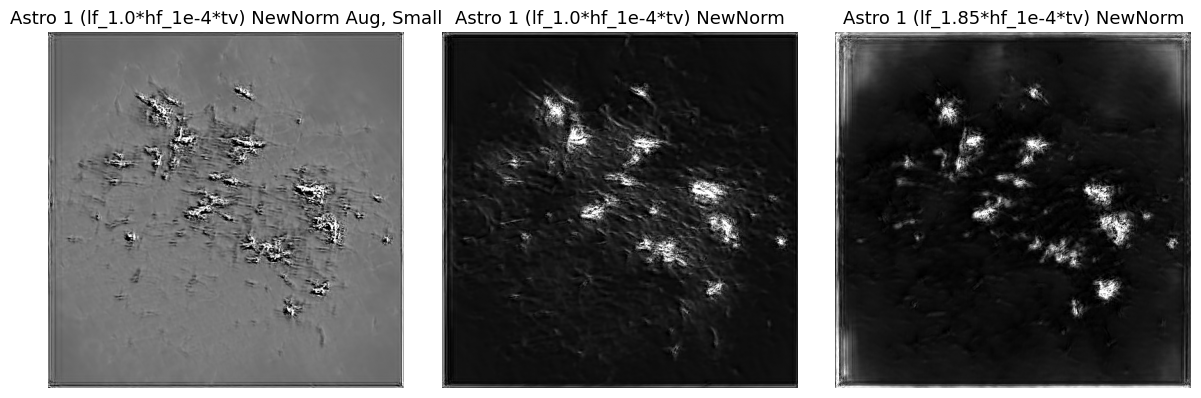

Step 50


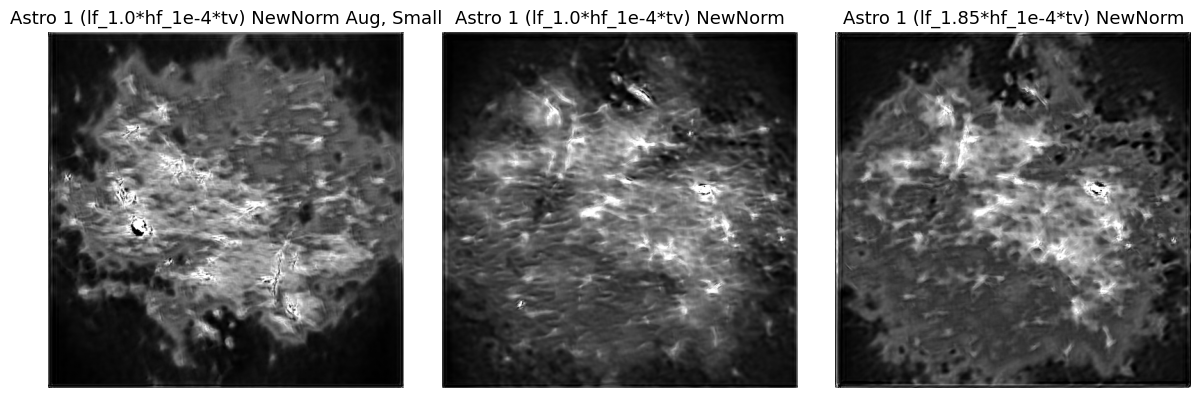

Step 100


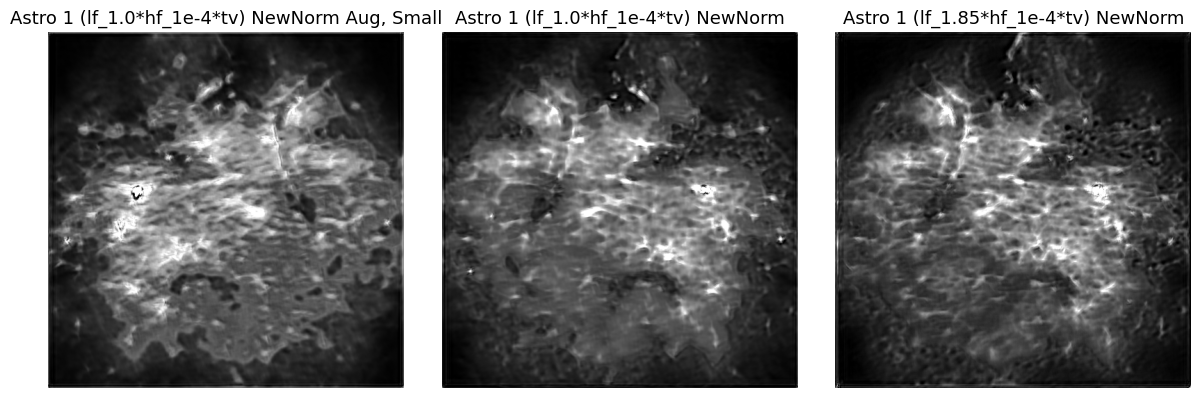

Step 150


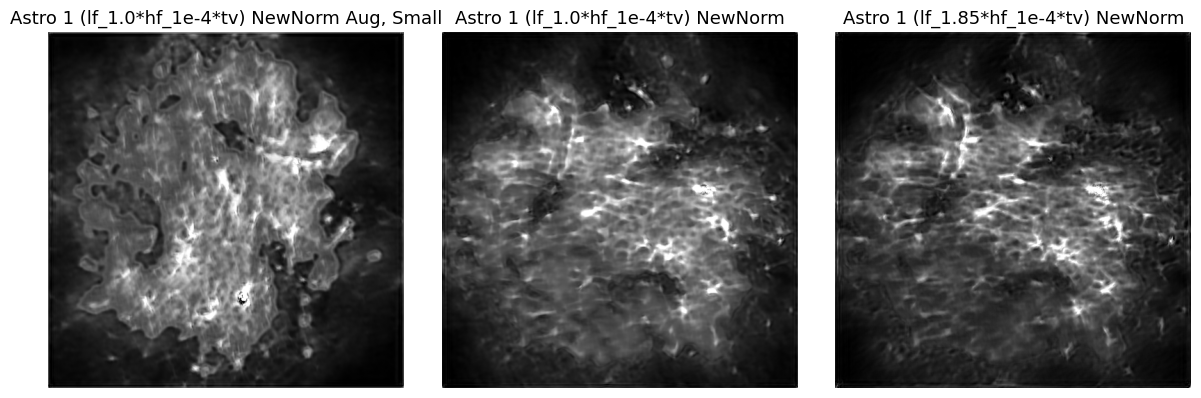

Step 200


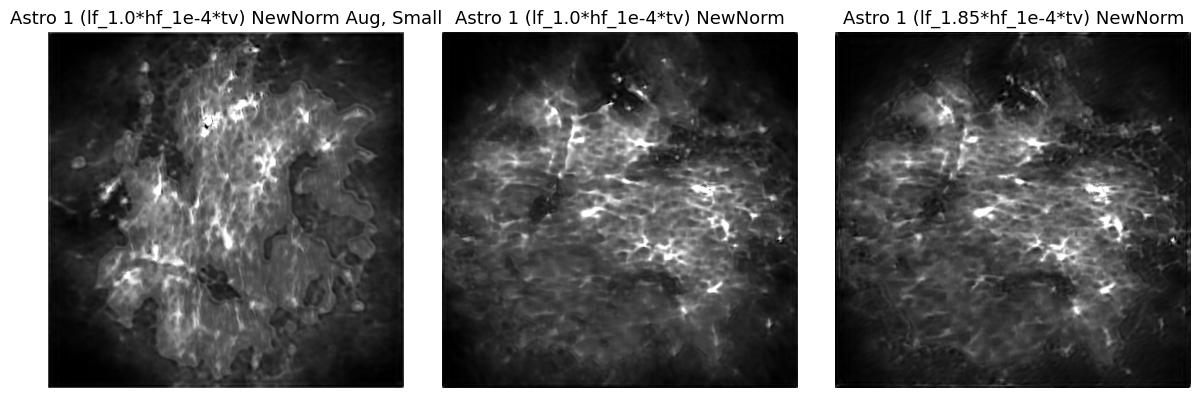

Step 250


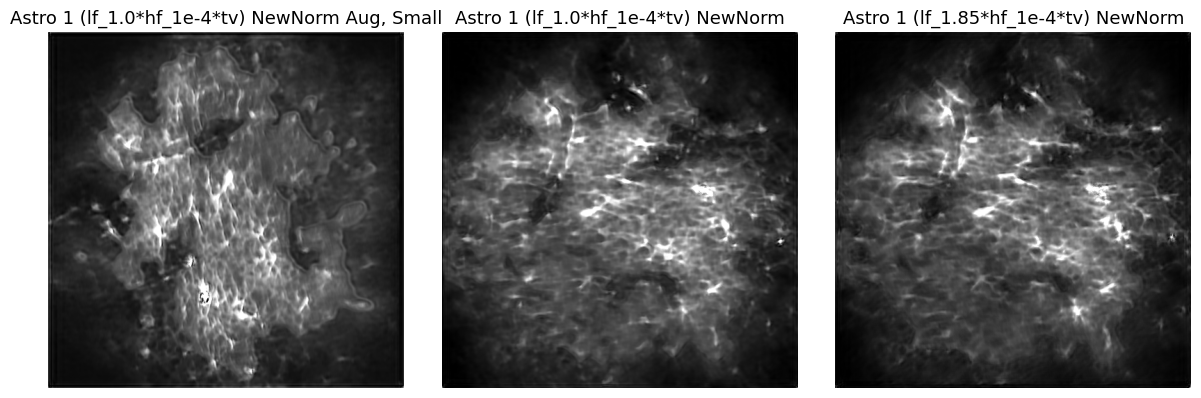

Step 300


In [ ]:
trainings = {
    # "Astro 192 (L1+SSIM+Grad)": "202508041831",
    
    #  Introduce Astro 1 dataset
    # "Astro 1 (L1+SSIM+Grad)": "202508041853",
    # "Astro 1 (MSE)": "202508041859",
    # "Astro 1 (MSE+L1+SSIM+Grad)": "202508041907",
    # "Astro 1 (MSE+.1L1+SSIM+Grad)": "202508041920",
    
    # Introduce new loss on both X and GT
    # "Astro 1 (lf_0.5*hf_1e-4*tv)": "202508051043",
    # "Astro 1 (lf_1.0*hf_1e-4*tv)": "202508051050",
    # "Astro 1 (lf_2.0*hf_2e-4*tv)": "202508051102",
    # "Astro 1 (MSE_x+SSIM_x+0.5*L1)": "202508051059",
    
    # Introduce new normalization
    "Astro 1 (lf_1.0*hf_1e-4*tv) NewNorm Aug, Small": "202508051619",
    "Astro 1 (lf_1.0*hf_1e-4*tv) NewNorm": "202508051626",
    "Astro 1 (lf_1.85*hf_1e-4*tv) NewNorm": "202508051638",

}
snaps = {k: sorted(Path(f"pth/{t}/snaps").glob("*.png"), key=lambda x: int(x.stem)) for k, t in trainings.items()}
for i in range(max([len(s) for s in snaps.values()])):
    cprint(f"green:Step {50*i}")
    imshow({t: subdivide(s[i])[-1] for t, s in snaps.items() if len(s) > i}, cmap="grey")